In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt


## Data

In [3]:
data = pd.read_csv("Language Detection.csv")
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [4]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [5]:
X = data["Text"]
y = data["Language"]

In [12]:
languages = y.unique()
nb_languages = len(languages)
print(languages)
print(nb_languages)

['English' 'Malayalam' 'Hindi' 'Tamil' 'Portugeese' 'French' 'Dutch'
 'Spanish' 'Greek' 'Russian' 'Danish' 'Italian' 'Turkish' 'Sweedish'
 'Arabic' 'German' 'Kannada']
17


In [15]:
lang_to_num={}
for i in range(0,nb_languages):
    lang_to_num[languages[i]]=i

In [16]:
y_encoded = [lang_to_num[l] for l in y]

In [7]:
from tensorflow.keras.utils import to_categorical

In [18]:
onehot = to_categorical(range(0,nb_languages))

In [20]:
target_list = [onehot[i] for i in y_encoded]

In [22]:
data_list = []
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        text = text.lower()
        
        data_list.append(text)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

C:\Users\newgh\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [24]:
X = cv.fit_transform(data_list).toarray()
X.shape

(10337, 34937)

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

## let's see what naive bayes has to say

In [26]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
y_pred = model.predict(x_test)
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

Accuracy is : 0.9753384912959381


one might say no need for DL for this task

### further eval

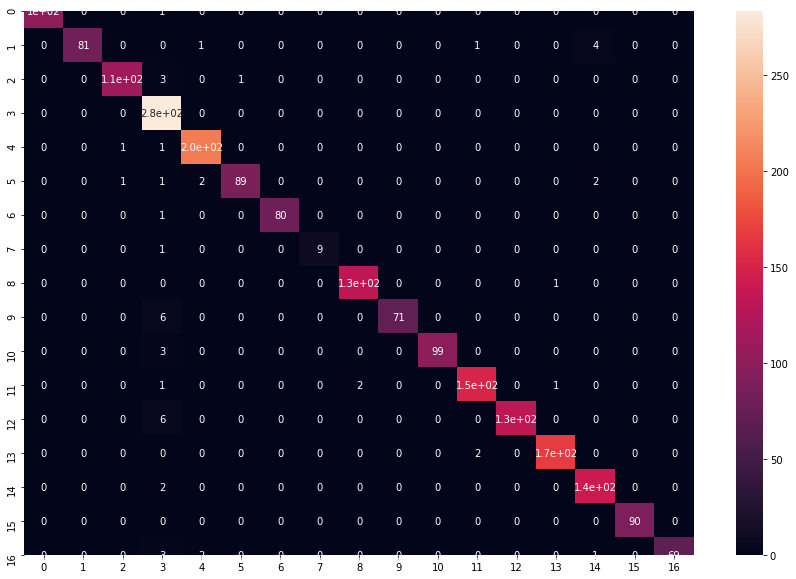

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()